# Solutions to 2.E

__I urge you to try the problems yourself first before looking at solutions.__

_Note: the following solutions may be incorrect._

$$\require{mhchem}$$

In [12]:
# %load src/header.py
from rdkit import Chem
from rdkit.Chem import Draw


def draw_molecule(smile):
    molecule = [Chem.MolFromSmiles(smile)]
    return Draw.MolsToGridImage(
        molecule,
        useSVG=True,
    )


def draw_molecules(smiles, names, per_row=2, size=(200, 250)):
    molecules = [Chem.MolFromSmiles(s) for s in smiles]
    return Draw.MolsToGridImage(
        molecules,
        legends=names,
        molsPerRow=per_row,
        useSVG=True,
        subImgSize=size,
    )


## 2-3

Let's start with the complete combustion of benzene to $\ce{CO2}$ and $\ce{H2O}$. Balancing chemical equations is essentially linear algebra. 

We need to put numbers before each molecule, but we do not know what they are. So, we'll use variables $w, x, y, z \in \mathbb{Q}$ for now:

$$
\ce{w * C6H6 + x * O2 -> y * CO2 + z * H2O}
$$

From this, we get three equations, one for each element present in the reaction. The coefficients come from the subscripts of the reaction equation.

$$
\begin{align}
6w + 0x &= 1y + 0z && (\ce{C}) \\
6w + 0x &= 0y + 2z && (\ce{H}) \\
0w + 2x &= 2y + 1z && (\ce{O}) \\
\end{align}
$$

We can represent this as a matrix equation:

$$
\begin{bmatrix}
6 & 0 & -1 & 0 \\
6 & 0 & 0  & -1 \\
0 & 2 & -2 & -1 \\
\end{bmatrix}
\begin{bmatrix}
w \\
x \\
y \\
z \\
\end{bmatrix}
= \vec{0}
$$

There are infinitely many solutions. That is, there is one free variable. So, I have the freedom to $w = 1$, arbitrarily. Substituting $w = 1$ into the equations above, I get

$$
\begin{bmatrix}
w \\
x \\
y \\
z \\
\end{bmatrix}
= 
\begin{bmatrix}
1 \\
15/2 \\
6 \\
3 \\
\end{bmatrix}
$$

We have a solution. But, since we do not like fractions in our balanced chemical equation, we will multiply by 2. In the end, our balanced equation is:

$$
\ce{2 * C6H6 + 15 * O2 -> 12 * CO2 + 6 * H2O}
$$

We can follow a similar procedure for the __incomplete__ combustion of benzene to get:

$$
\ce{2 * C6H6 + 9 * O2 -> 12 * CO + 6 * H2O}
$$

## 2-7

### a.

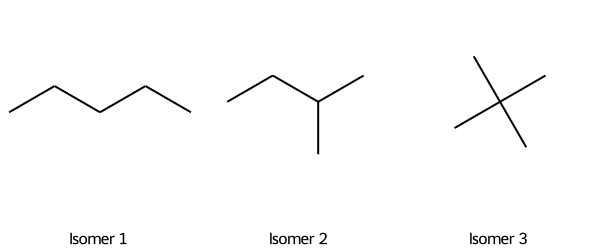

In [47]:
isomers = [
    'C' * 5,
    'CCC(C)C',
    'C(C)(C)(C)(C)',
]
names = [f'Isomer {i}' for i in range(1, len(isomers) + 1)]
draw_molecules(isomers, names, 3)